In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv('ScamDataset', sep='\t', names=['Label', 'message'])


# # Check the shape of the DataFrame before removing duplicates
# print("Before removing duplicates:", df.shape)

# # Identifying duplicates
# duplicates = df.duplicated(subset='message', keep=False)

# # Extract the rows that are duplicates
# duplicate_rows = df[duplicates]

# # Display or process duplicate rows
# print(f'Rows that are duplicated: {duplicate_rows}')

# # # Remove duplicates based on the 'message' column
# df = df.drop_duplicates(subset='message', keep='first')

# # Counting duplicates
# duplicate_count = duplicates.sum()

# print(f'Number of duplicate messages: {duplicate_count}')

# # Check the shape of the DataFrame after removing duplicates
# print("After removing duplicates:", df.shape)


df['Label'] = df['Label'].map({'normal': 0, 'fraud': 1})

df['Label']

# Count the number of 'fraud' entries
fraud_count = (df['Label'] == 1).sum()
non_fraud_count = (df['Label'] == 0).sum()
print(f'Number of fraud data: {fraud_count}')
print(f'Number of non fraud data: {non_fraud_count}')

Number of fraud data: 1385
Number of non fraud data: 10109


In [40]:
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['Label'], test_size=0.2, random_state=42)

print(X_train)

2347     Its posible dnt live in  &lt;#&gt; century cm ...
3330       Sac will score big hundred.he is set batsman:-)
5948                           It took Mr owl three licks.
5333     Neither [in sterm voice] - i'm studying. All f...
4434     Can u look 4 me in da lib i got stuff havent f...
                               ...                        
5598     hello sir,  i am from bsnl customer care in 23...
5633     you won a lucky draw for shopping on an amazon...
5866                               Oops. for got that bit.
879      U have a secret admirer who is looking 2 make ...
10923    HEY KATE,  HOPE UR OK... WILL GIVE U A BUZ WED...
Name: message, Length: 5913, dtype: object


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

# Feature extraction: TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

# Initialize an empty dictionary to store accuracies
accuracies = {}

# Initialize an empty dictionary to store loss
loss = {}

In [42]:
from sklearn.naive_bayes import MultinomialNB

# Naive Bayes
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
accuracies['NB'] = accuracy
print(f"Naive Bayes Accuracy: {accuracy:.4f}")


Naive Bayes Accuracy: 0.9790


In [43]:
from sklearn.svm import SVC

#SVC
model = SVC()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
accuracies['SVC'] = accuracy
print(f"SVC: {accuracy:.4f}")

SVC: 0.9899


In [44]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest
model = RandomForestClassifier()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
accuracies['Random Forest'] = accuracy
print(f"Random Forest Classifier: {accuracy:.4f}")

Random Forest Classifier: 0.9892


In [45]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
accuracies['Logistic Regression'] = accuracy
print(f"Logistic Regression: {accuracy:.4f}")

Logistic Regression: 0.9790


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping

# Deep Learning Model: Simple LSTM
# Tokenize text
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(df['message'])
X = tokenizer.texts_to_sequences(df['message'])
X = pad_sequences(X, maxlen=50)

# Split dataset 80:20
X_train, X_test, y_train, y_test = train_test_split(X, df['Label'], test_size=0.2, random_state=42)


# Build LSTM model
model = Sequential()
model.add(Embedding(1000, 128, input_length=50))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1, callbacks=[early_stop], verbose=2)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
accuracies['LSTM'] = accuracy

print(f"LSTM Model Accuracy: {accuracy:.4f}")


Epoch 1/10
84/84 - 8s - loss: 0.2347 - accuracy: 0.9192 - val_loss: 0.0691 - val_accuracy: 0.9831 - 8s/epoch - 99ms/step
Epoch 2/10
84/84 - 8s - loss: 0.0565 - accuracy: 0.9825 - val_loss: 0.0631 - val_accuracy: 0.9797 - 8s/epoch - 91ms/step
Epoch 3/10
84/84 - 8s - loss: 0.0362 - accuracy: 0.9902 - val_loss: 0.0707 - val_accuracy: 0.9797 - 8s/epoch - 97ms/step
Epoch 4/10
84/84 - 7s - loss: 0.0273 - accuracy: 0.9938 - val_loss: 0.0876 - val_accuracy: 0.9747 - 7s/epoch - 86ms/step
Epoch 5/10
84/84 - 8s - loss: 0.0210 - accuracy: 0.9949 - val_loss: 0.0851 - val_accuracy: 0.9831 - 8s/epoch - 94ms/step
Epoch 5: early stopping
LSTM Model Accuracy: 0.9892


In [47]:

# Split dataset 70:30
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, df['Label'], test_size=0.3, random_state=42)

history = model.fit(X_train2, y_train2, epochs=10, batch_size=64, validation_split=0.1, callbacks=[early_stop], verbose=2)

# Evaluate
loss, accuracy = model.evaluate(X_test2, y_test2, verbose=0)
print(f"LSTM Model Accuracy: {accuracy:.4f}")


Epoch 1/10
73/73 - 6s - loss: 0.0185 - accuracy: 0.9951 - val_loss: 0.1014 - val_accuracy: 0.9768 - 6s/epoch - 87ms/step
Epoch 2/10
73/73 - 8s - loss: 0.0132 - accuracy: 0.9963 - val_loss: 0.0947 - val_accuracy: 0.9768 - 8s/epoch - 104ms/step
Epoch 3/10
73/73 - 7s - loss: 0.0132 - accuracy: 0.9963 - val_loss: 0.0874 - val_accuracy: 0.9788 - 7s/epoch - 97ms/step
Epoch 4/10
73/73 - 7s - loss: 0.0099 - accuracy: 0.9970 - val_loss: 0.1120 - val_accuracy: 0.9768 - 7s/epoch - 97ms/step
Epoch 5/10
73/73 - 6s - loss: 0.0095 - accuracy: 0.9981 - val_loss: 0.1082 - val_accuracy: 0.9749 - 6s/epoch - 88ms/step
Epoch 6/10
73/73 - 7s - loss: 0.0088 - accuracy: 0.9979 - val_loss: 0.1039 - val_accuracy: 0.9788 - 7s/epoch - 90ms/step
Epoch 6: early stopping
LSTM Model Accuracy: 0.9901


In [48]:
# Split dataset 60:40
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, df['Label'], test_size=0.4, random_state=42)

history = model.fit(X_train3, y_train3, epochs=10, batch_size=64, validation_split=0.1, callbacks=[early_stop], verbose=2)

# Evaluate
loss, accuracy = model.evaluate(X_test3, y_test3, verbose=0)
print(f"LSTM Model Accuracy: {accuracy:.4f}")



Epoch 1/10
63/63 - 7s - loss: 0.0070 - accuracy: 0.9985 - val_loss: 0.1278 - val_accuracy: 0.9730 - 7s/epoch - 107ms/step
Epoch 2/10
63/63 - 6s - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.1467 - val_accuracy: 0.9707 - 6s/epoch - 98ms/step
Epoch 3/10
63/63 - 6s - loss: 0.0040 - accuracy: 0.9987 - val_loss: 0.1616 - val_accuracy: 0.9730 - 6s/epoch - 88ms/step
Epoch 4/10
63/63 - 5s - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.1719 - val_accuracy: 0.9707 - 5s/epoch - 85ms/step
Epoch 4: early stopping
LSTM Model Accuracy: 0.9899


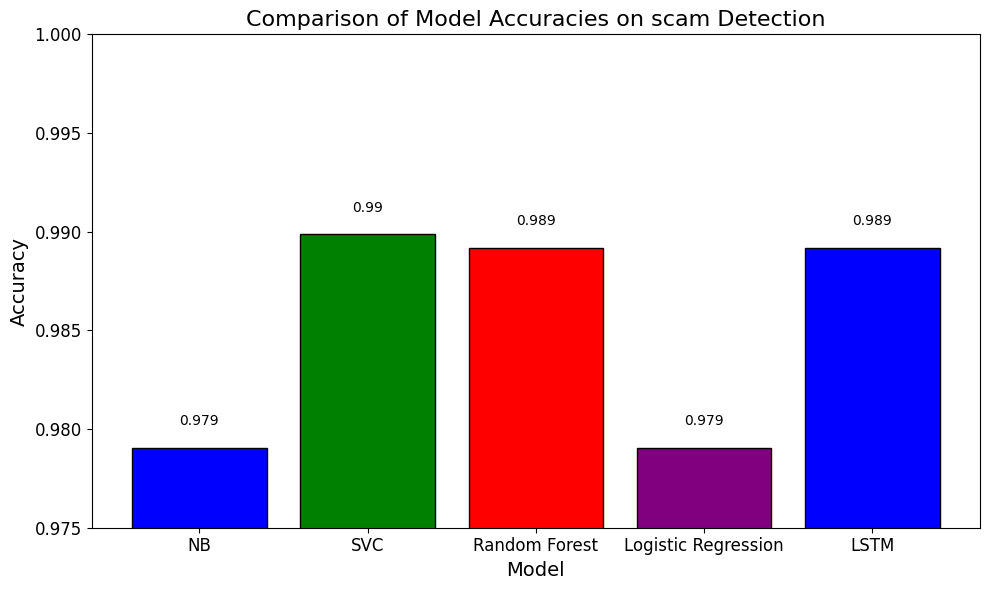

In [49]:
import matplotlib.pyplot as plt
# Plotting the accuracies using a more distinct graph style
plt.figure(figsize=(10, 6))

# Create a bar graph with distinct colors and edge color
bars = plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'purple'], edgecolor='black')

# Add data labels above each bar for clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, round(yval, 3), ha='center', va='bottom')

plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Comparison of Model Accuracies on scam Detection', fontsize=16)
plt.ylim(0.975, 1)  # Set y-axis limit to make differences more distinct
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()